[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8]
[ 1.          0.99500417  0.98006658  0.

Text(0.5, 1.0, 'Cosine Wave')

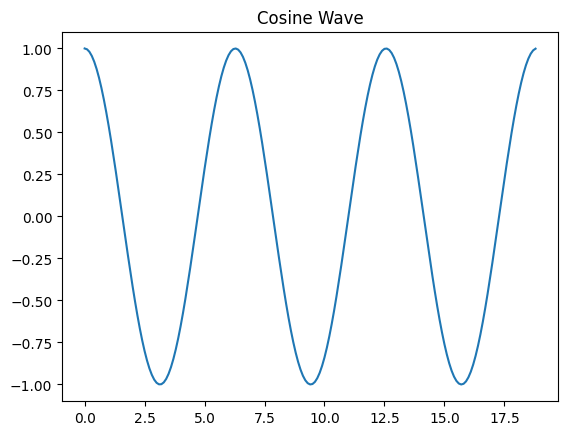

In [28]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, np.pi*6, 0.1)
print(x)
y = np.cos(x)
print(y)

plt.plot(x,y)
plt.title("Cosine Wave")

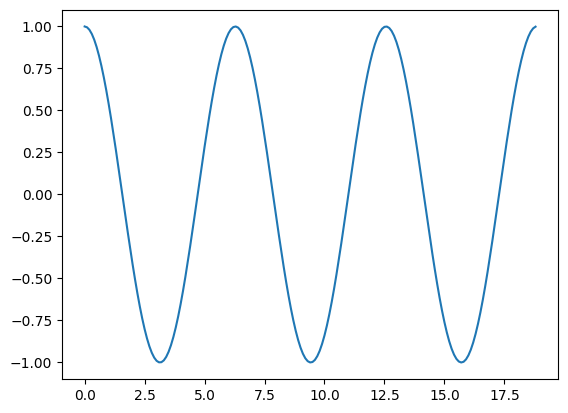

In [68]:
def gen(freq, sample_rate, duration):
    y = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x*freq
    x = np.sin(np.pi*frequencies)
    return x,y

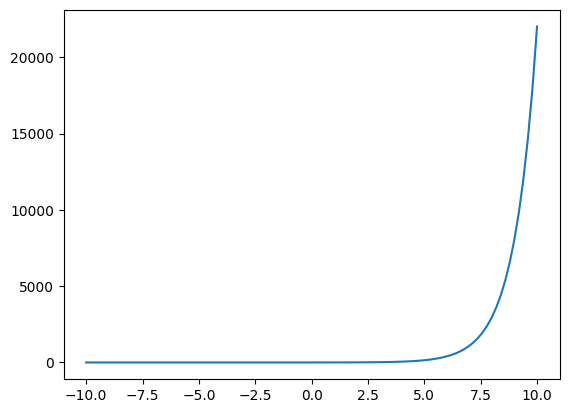

In [7]:
x = np.linspace(-10,10,100)
y = np.exp(x)

plt.plot(x,y)

<StemContainer object of 3 artists>

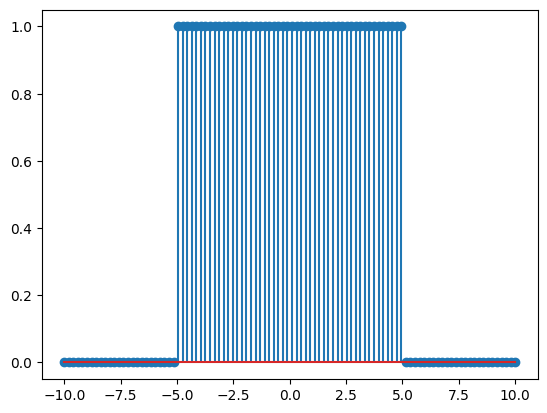

In [7]:
x = np.linspace(-10,10,100)
y = np.zeros(len(x))
y[25:75] = 1

plt.stem(x,y)

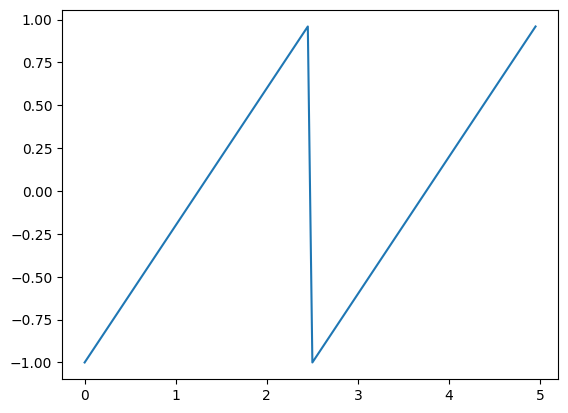

In [8]:
from scipy import signal

x = np.arange(0,5,1/20)

y = signal.sawtooth(2*np.pi*0.4*x)

plt.plot(x,y)

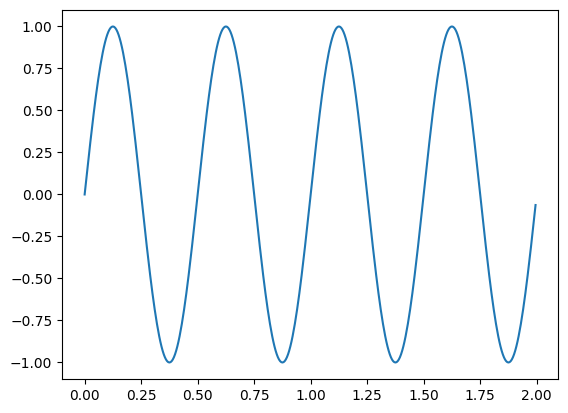

In [14]:
def generateSineWave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x*freq
    y = np.sin(np.pi*frequencies)
    return x,y

x,y = generateSineWave(4, 200, 2)
plt.plot(x,y)

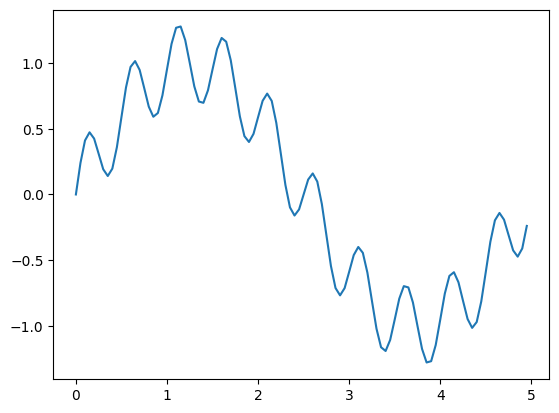

In [15]:
nice_tone_x, nice_tone_y = generateSineWave(0.4,20,5)
noise_tone_x, noise_tone_y = generateSineWave(4,20,5)

noise_tone_y = noise_tone_y * 0.3

mixed_tone_y = nice_tone_y + noise_tone_y
plt.plot(nice_tone_x, mixed_tone_y)

<StemContainer object of 3 artists>

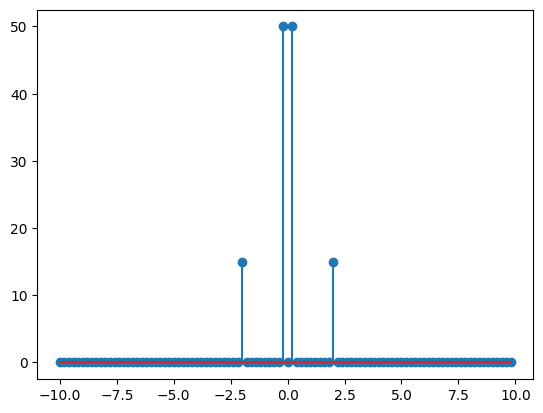

In [20]:
from scipy.fft import fft, fftfreq, ifft

sample_rate = 20
duration = 5

xf = fftfreq(sample_rate*duration, 1/sample_rate)
yf = fft(mixed_tone_y)

plt.stem(xf,np.abs(yf))

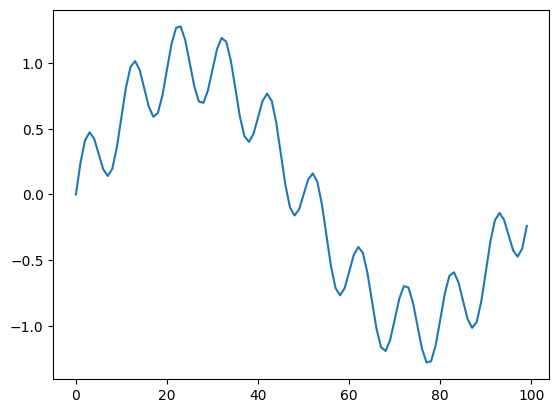

In [81]:
reconstructed = ifft(yf)
plt.plot(np.real(reconstructed))

In [37]:
a = np.array([1,2,3])
b = np.array([1,2,3])
np.convolve(a,b,mode='valid')

array([10])

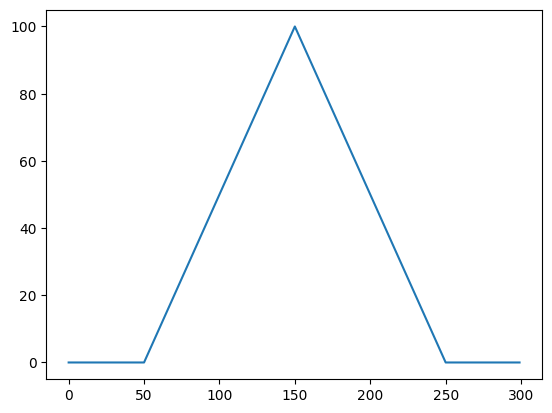

In [39]:
a = np.repeat([0.,1.,0.], 100)
b = np.repeat([0.,1.,0.], 100)
filtered = np.convolve(a,b,mode="same")
plt.plot(filtered)

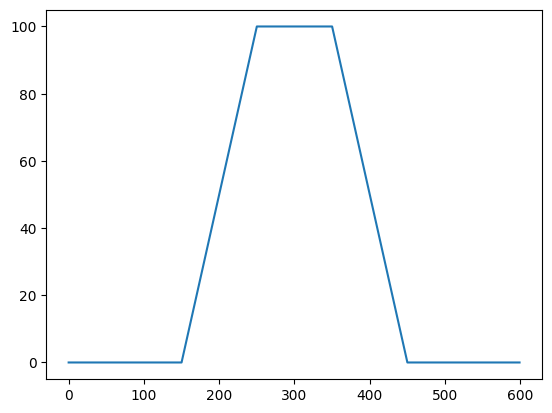

In [41]:
a = np.repeat([0.,1.,0.], 100)
b = np.repeat([0.,1.,0.], 200)
filtered = np.convolve(a,b,mode="same")
plt.plot(filtered)

In [21]:
from PIL import Image, ImageFilter

file = "home.jpg"
with Image.open(file) as img:
    img.load()

isinstance(img, Image.Image)

True

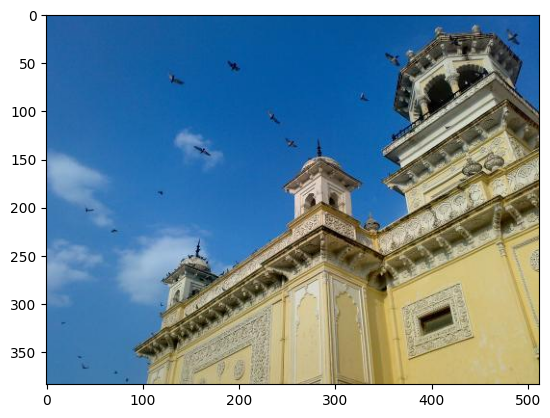

In [45]:
import matplotlib.pyplot as plt

plt.imshow(img)

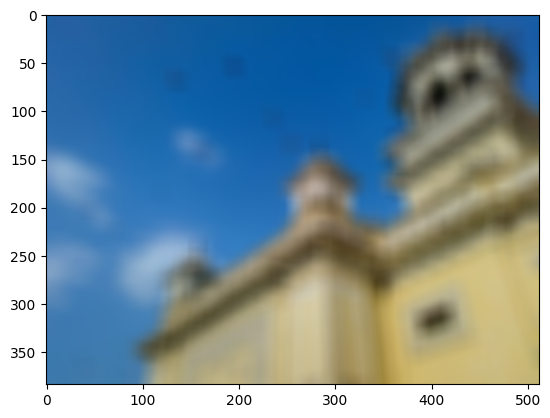

In [46]:
box_blur = img.filter(ImageFilter.BoxBlur(10))
plt.imshow(box_blur)

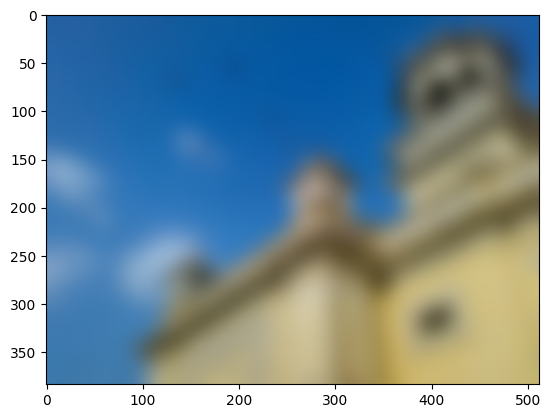

In [48]:
gaus_blur = img.filter(ImageFilter.GaussianBlur(10))
plt.imshow(gaus_blur)

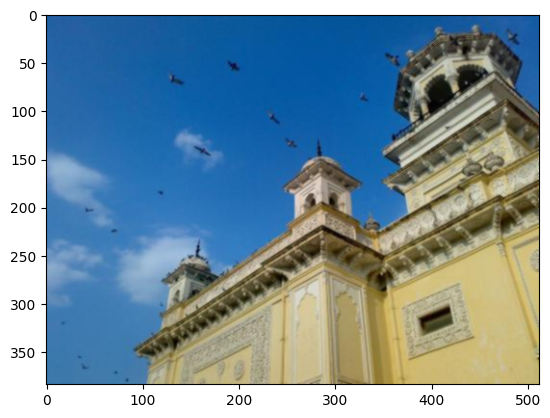

In [23]:
# img_gray = img.convert('L')
img_edges = img.filter(ImageFilter.SMOOTH)
plt.imshow(img_edges, cmap="gray")

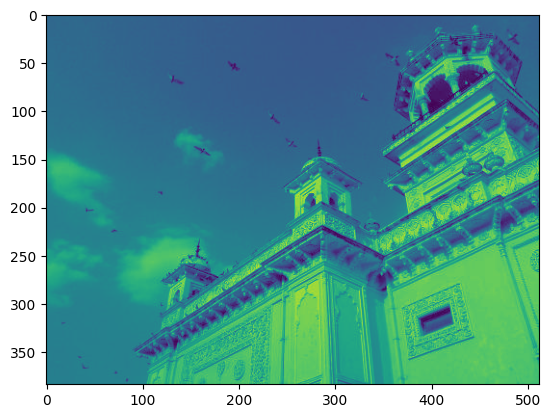

In [25]:
import cv2 as cv
img = cv.imread('./home.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(gray, cv.COLOR_BGR2RGB)
plt.imshow(gray)

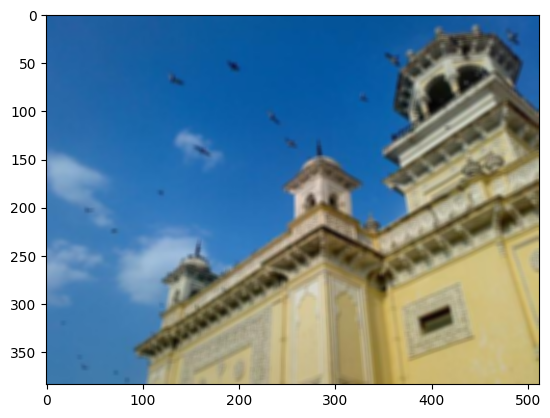

In [27]:
mean_filter = np.ones((5,5))
mean_filter/=25

result = cv.filter2D(img, -1, mean_filter)
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
plt.imshow(result)

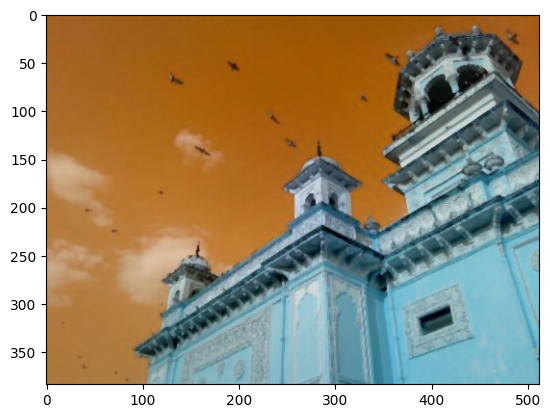

In [91]:
result = cv.medianBlur(img, 3)
plt.imshow(result)

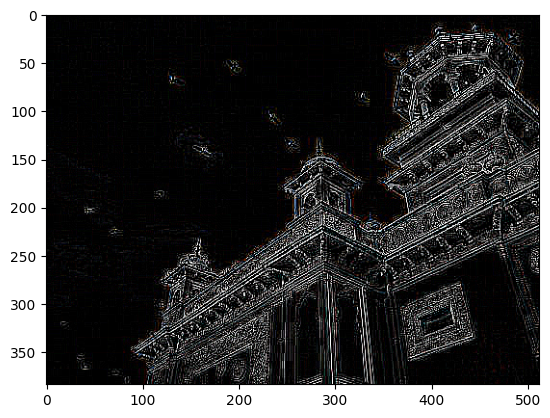

In [94]:
max_filter = np.ones((3,3))
max_filter *=-1
max_filter[1,1] = 8

result = cv.filter2D(img, -1, max_filter)
plt.imshow(result)

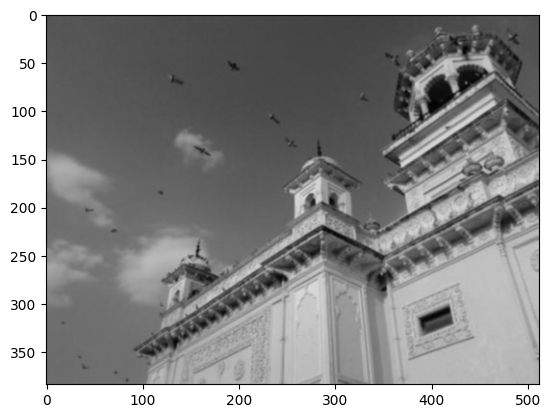

In [115]:
result = cv.GaussianBlur(gray, (3,3), 0)
img2 = cv.cvtColor(result, cv.COLOR_BGR2RGB)
plt.imshow(img2)

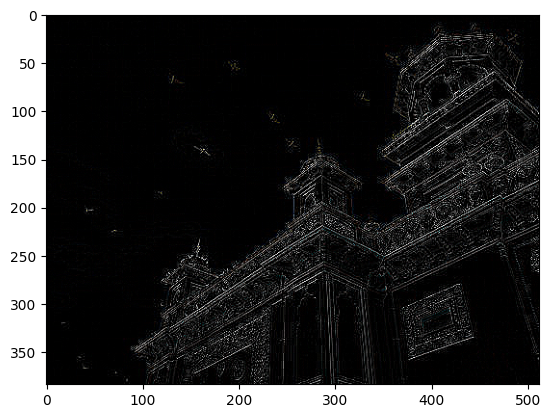

In [116]:
result = cv.Laplacian(img, -1)
plt.imshow(result)

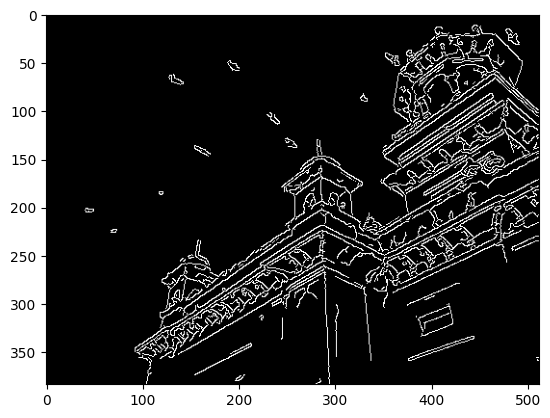

In [110]:
a = cv.filter2D(img, -1, mean_filter)
b = cv.Canny(a, 100,200)

plt.imshow(b, cmap='gray')

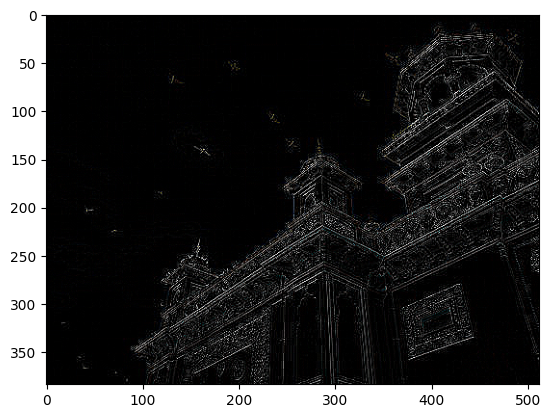

In [108]:
filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])
result = cv.filter2D(img, -1, filter)
plt.imshow(result)